Plot Example Map for each Rearing Condition

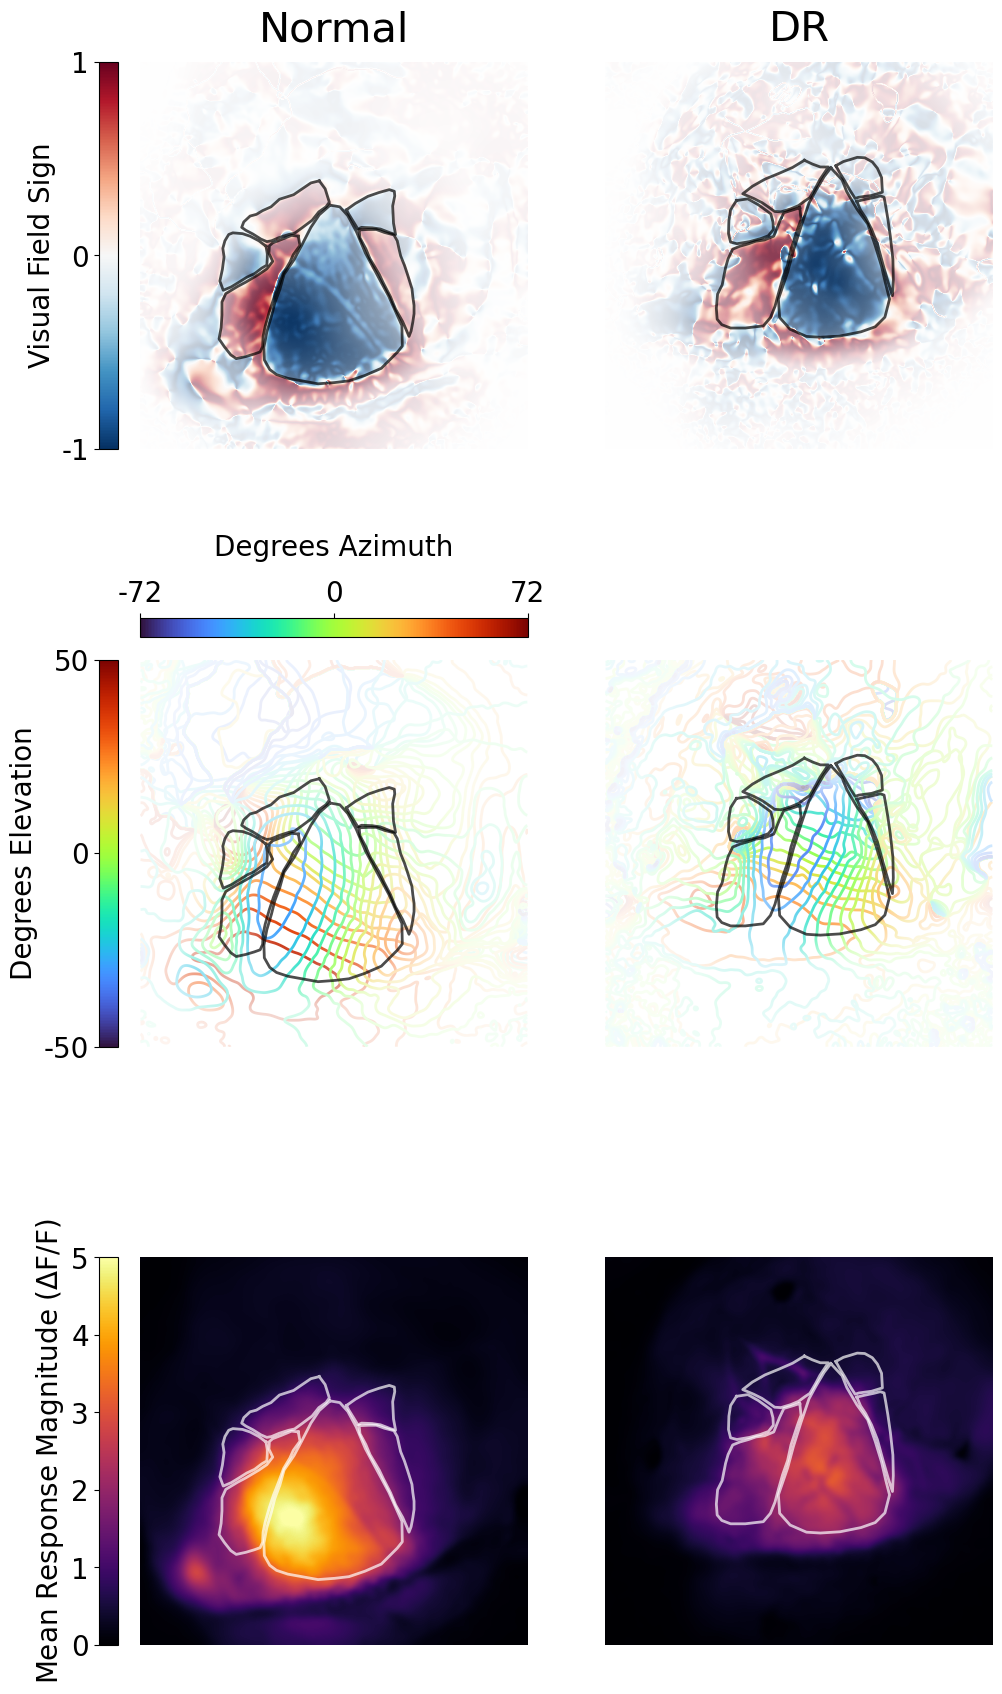

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from tifffile import imread
from skimage import filters

def draw_colorbar(mappable, cax, label="", num_ticks=6, width="5%", height="100%", loc="center left", frmt="%i", ori="vertical", label_pos="left"):
    cax = inset_axes(cax, width=width, height=height, loc=loc, borderpad=-3)
    colorbar = fig.colorbar(mappable, cax=cax, orientation=ori)
    colorbar.set_label(label, color='k', fontsize=20)
    colorbar.ax.locator_params(nbins=num_ticks)
    if ori == "vertical":
        cax.yaxis.tick_left()
        cax.yaxis.set_label_position(label_pos)
        cax.yaxis.set_major_formatter(FormatStrFormatter(frmt))
    elif ori == "horizontal":
        cax.xaxis.tick_top()
        cax.xaxis.set_label_position(label_pos)
        cax.xaxis.set_major_formatter(FormatStrFormatter(frmt))
    cax.tick_params(labelsize=20)
    return colorbar

exp_path = "/Users/ryan.gorzek/Documents/Trachtenberg Lab/Data/Mapping_Through_Skull/"
examples = ["ctb03/20220623_161247/", 
            "ctb01/20220603_101509/"]
area_list = ["V1", "LM", "AL", "RL", "AM", "PM"]
%matplotlib inline
fig, axs = plt.subplots(3, 2)
for ex_num, ex in enumerate(zip(examples, ["NR", "DR"])):
    ref_frame = imread(exp_path + ex[0] + "refframe.tif").squeeze()
    signmap = np.loadtxt(exp_path + ex[0] + "signmap.csv")
    azimuth = np.loadtxt(exp_path + ex[0] + "azimuth.csv")
    elevation = np.loadtxt(exp_path + ex[0] + "elevation.csv")
    avg_mag = np.loadtxt(exp_path + ex[0] + "avg_mag.csv")*100
    alphas = filters.gaussian((avg_mag/np.max(avg_mag)), 10)
    # Sign Map
    axs[0][ex_num].imshow(signmap, cmap="RdBu_r", alpha=1*alphas, clim=[-1, 1])
    axs[0][ex_num].axis("off")
    if ex_num == 0:
        draw_colorbar(axs[0][ex_num].images[0], axs[0][ex_num], label="Visual Field Sign", num_ticks=3)
    for area in area_list:
        area_coords = np.loadtxt(exp_path + ex[0] + area + ".csv")
        axs[0][ex_num].plot(area_coords[:,0], area_coords[:,1], color="k", linewidth=2, alpha=0.7)
    # Azimuth/Elevation
    axs[1][ex_num].imshow(elevation, cmap='turbo', alpha=1, clim=[0, 100], zorder=-3)
    axs[1][ex_num].imshow(azimuth, cmap='turbo_r', alpha=1, clim=[0, 144], zorder=-3)
    axs[1][ex_num].imshow(np.full((512, 512), 1), cmap="gray", clim=[0, 1], zorder=-2, alpha=1)
    axs[1][ex_num].contour(elevation, levels=np.arange(0, 100, 5), cmap='turbo', alpha=1, linewidths=2, zorder=-1)
    axs[1][ex_num].contour(azimuth, levels=np.arange(0, 144, 7.5), cmap='turbo_r', alpha=1, linewidths=2, zorder=-1)
    axs[1][ex_num].imshow(np.full((512, 512), 1), cmap="gray", clim=[0, 1], zorder=1, alpha=0.95*(1-alphas))
    if ex_num == 0:
        cbar_az = draw_colorbar(axs[1][0].images[1], axs[1][0], num_ticks=3, width="100%", height="5%", loc="upper center", ori="horizontal", label_pos="top")
        cbar_az.ax.set_xticks([0, 72, 144])
        cbar_az.ax.set_xticklabels(["72", "0", "-72"])
        cbar_az.ax.invert_xaxis()
        axs[1][ex_num].set_title("Degrees Azimuth", fontsize=20, pad=75)
        cbar_el = draw_colorbar(axs[1][0].images[0], axs[1][0], label="Degrees Elevation", num_ticks=3, frmt="%i")
        cbar_el.ax.set_yticks([0, 50, 100])
        cbar_el.ax.set_yticklabels(["-50", "0", "50"])
    axs[1][ex_num].axis("off")
    for area in area_list:
        area_coords = np.loadtxt(exp_path + ex[0] + area + ".csv")
        axs[1][ex_num].plot(area_coords[:,0], area_coords[:,1], color="k", linewidth=2, alpha=0.7)
    # Magnitude
    axs[2][ex_num].imshow(avg_mag, cmap="inferno", alpha=1, clim=[0, 5])
    axs[2][ex_num].axis("off")
    for area in area_list:
        area_coords = np.loadtxt(exp_path + ex[0] + area + ".csv")
        axs[2][ex_num].plot(area_coords[:,0], area_coords[:,1], color="w", linewidth=2, alpha=0.7)
    if ex_num == 0:
        draw_colorbar(axs[2][ex_num].images[0], axs[2][ex_num], label="Mean Response Magnitude ($\Delta$F/F)", num_ticks=6)
    if ex_num == 0:
        axs[0][ex_num].set_title("Normal", fontsize=30, pad=15)
    else:
        axs[0][ex_num].set_title("DR", fontsize=30, pad=15)
# Set figure parameters.
fig.set_size_inches(11, 22)
fig.savefig(exp_path + "example.png", bbox_inches="tight")